# Pela Via Literal

##### Dada a hipotética função ondulatória:  

## $$ \psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) $$

##### Solucionar a equação por meio da integração, tendo em vista, aoproximar a  sintaxe de programação à linguaqgem de maquina.

In [3]:

#Bibliotecas
%matplotlib inline
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils.random import check_random_state
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from scipy.integrate import quad
import sympy as sy



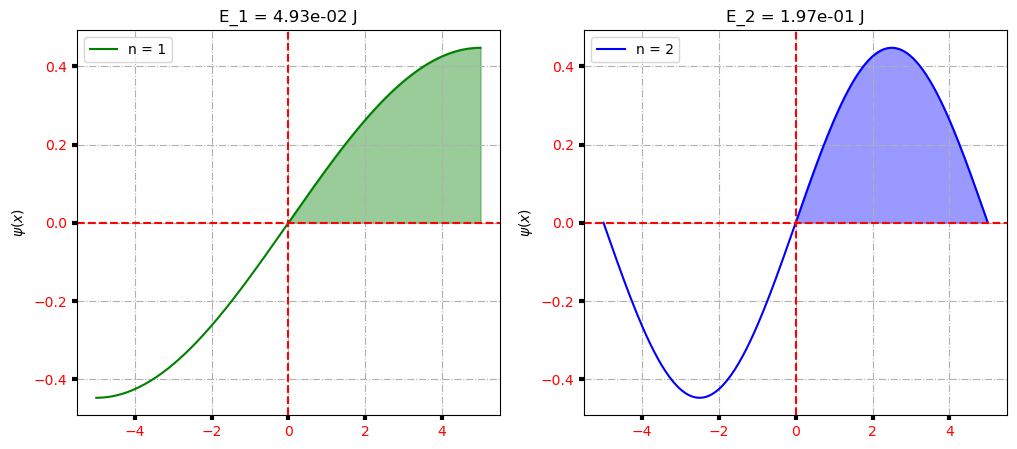

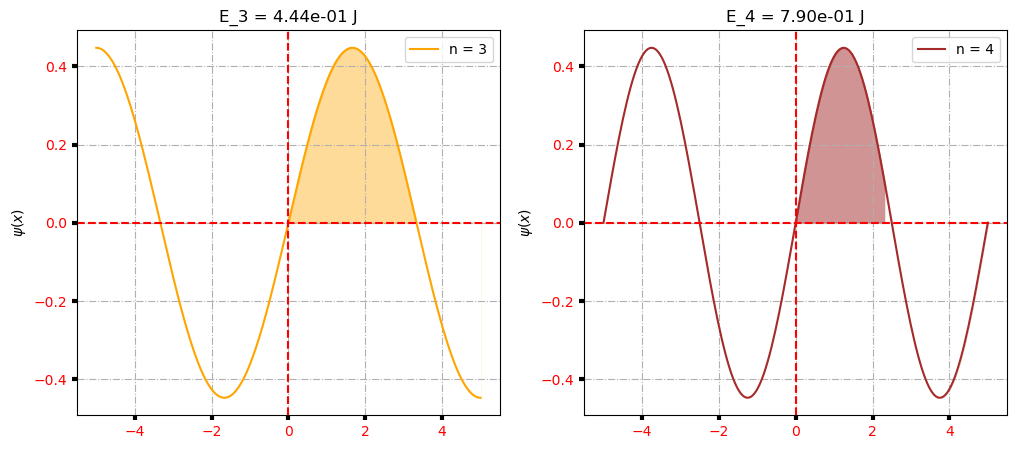

In [4]:
#Cálculo, análise e gráficos dos 4 primeiros níveis de energia

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
a=10
m=1
hbar=1
x = np.linspace(-a/2, a/2, 200)
x2 = np.linspace(0, a/2, 200)

def calcular_energia(n, hbar, m, a):
  """Calcula a energia de uma partícula numa caixa unidimensional."""
  return (n**2 * np.pi**2 * hbar**2) / (2 * m * a**2)


y1=np.sqrt(2/a)*(np.sin((1*np.pi*x)/a))
ax1.plot(x,y1, color='green', alpha=1.0, label='n = 1')
ax1.axhline(y=0, color="red", linestyle="--")
ax1.axvline(x=0, color="red", linestyle="--")

ax1.fill_between(x,y1, where = (x > 0), color='green', alpha=0.4)
E1= calcular_energia(1, hbar, m, a)
ax1.set_title(f"E_{1} = {E1:.2e} J")
ax1.set_ylabel('$\psi(x)$')
ax1.legend()

y2=np.sqrt(2/a)*(np.sin((2*np.pi*x)/a))
ax2.plot(x,y2, color='blue', alpha=1.0, label = 'n = 2')
ax2.axhline(y=0, color="red", linestyle="--")
ax2.axvline(x=0, color="red", linestyle="--")
ax2.fill_between(x,y2, where = (x > 0), color='blue', alpha=0.4)
E2= calcular_energia(2, hbar, m, a)

ax2.set_title(f"E_{2} = {E2:.2e} J")
ax2.set_ylabel('$\psi(x)$')
ax2.legend()

ax1.grid(True, linestyle='-.')
ax1.tick_params(labelcolor='r', labelsize='medium', width=3)

ax2.grid(True, linestyle='-.')
ax2.tick_params(labelcolor='r', labelsize='medium', width=3)

plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

y3=np.sqrt(2/a)*(np.sin((3*np.pi*x)/a))
ax1.plot(x,y3, color='orange', alpha=1.0, label = 'n = 3')
ax1.axhline(y=0, color="red", linestyle="--")
ax1.axvline(x=0, color="red", linestyle="--")
ax1.fill_between(x,y3, where = (x > 0), color='orange', alpha=0.4)
ax1.fill_between(x,y3, where = (x > 3.3), color='white', alpha=1.0)
E3= calcular_energia(3, hbar, m, a)
ax1.set_title(f"E_{3} = {E3:.2e} J")
ax1.set_ylabel('$\psi(x)$')

y4=np.sqrt(2/a)*(np.sin((4*np.pi*x)/a))
ax2.plot(x,y4, color='brown', alpha=1.0, label = 'n = 4')
ax2.axhline(y=0, color="red", linestyle="--")
ax2.axvline(x=0, color="red", linestyle="--")
ax2.fill_between(x,y4, where = (x > 0), color='brown', alpha=0.5)
ax2.fill_between(x,y4, where = (x > 2.3), color='white', alpha=1.0)
E4= calcular_energia(4, hbar, m, a)

ax2.set_title(f"E_{4} = {E4:.2e} J")
ax2.set_ylabel('$\psi(x)$')

ax1.grid(True, linestyle='-.')
ax1.tick_params(labelcolor='r', labelsize='medium', width=3)

ax2.grid(True, linestyle='-.')
ax2.tick_params(labelcolor='r', labelsize='medium', width=3)
ax1.legend()
ax2.legend()
plt.show()



### Soluções, via Cálculo Integral para:  

## $$ \int_0^L \psi_n^2(x) \ dx $$

## $$ \psi_n^2(x) = \frac{2}{L} \sin^2\left(\frac{n\pi x}{L}\right) $$

### Dois cenários:

In [5]:
#MÉTODO QUAD

import numpy as np
from scipy.integrate import quad
import math
L=10
# 1. função a ser integrada
def f(x):
    return (2/L) * math.sin(i*math.pi*x/L)**2

# 2. os limites de integração
a = 0  # Limite inferior
b = 10  # Limite superior

# 3. Calculo da integral usando quad
for i in range(1,5):
    valor_integral, erro = quad(f, a, b)

# 4.esultado
    print(f"A função integrada de {a} a {b} de n = {str(i)} é: {valor_integral} ")
    print(f"O erro estimado foi de: {erro}")

A função integrada de 0 a 10 de n = 1 é: 1.0 
O erro estimado foi de: 1.1102230246251565e-14
A função integrada de 0 a 10 de n = 2 é: 1.0 
O erro estimado foi de: 7.339840831400506e-10
A função integrada de 0 a 10 de n = 3 é: 1.0 
O erro estimado foi de: 1.1102230246251565e-14
A função integrada de 0 a 10 de n = 4 é: 1.0 
O erro estimado foi de: 7.33984109602126e-10


In [6]:
#VIA LITERAL
import math
dx=0.1
x=np.linspace(-5,5,100)
sum=0
passo=0
area=0
L=10
for j in range(1,5):
    for i in range(0,100):
        passo=x[i]
        y=(2/L) * 1*math.sin(j*math.pi*passo/L)**2
        area=y*dx
        sum+=area
    print('PDF para n=',j, sum-(j-1))

PDF para n= 1 1.01
PDF para n= 2 1.0000000000000009
PDF para n= 3 1.009999999999999
PDF para n= 4 0.9999999999999987


In [7]:
import numpy as np
import sklearn
from gplearn.genetic import SymbolicRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sympy import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.utils.random import check_random_state
import graphviz

# 1. Generate synthetic data (e.g., y = 2*X_0 + 3*X_1^2)
a=10
x=np.linspace(-a/2,a/2/100)
y=np.sqrt(2/a)*np.sin((1*np.pi*x)/a)

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


                      

## Bibioteca PYSR

In [8]:
import pysr

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [9]:
equations = pysr.PySRRegressor(
    niterations=40,
    binary_operators=["+", "*"],  # operators that can combine two terms
    unary_operators=["sin"],  # operators that modify a single term
)
equations.fit(X_train.reshape(-1,1), y_train)

C:\Users\USER\anaconda3\Lib\site-packages\pysr\sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.062e-02  0.000e+00  y = -0.28986
3           1.547e-03  1.295e+00  y = x₀ * 0.10632
4           1.228e-03  2.313e-01  y = sin(x₀ * 0.11042)
5           8.628e-04  3.528e-01  y = (x₀ + -0.56215) * 0.091631
6           4.451e-11  1.678e+01  y = sin(x₀ * 0.31418) * 0.44721
16          3.586e-11  2.161e-02  y = sin((((x₀ + ((x₀ * 0.015662) + x₀)) * 0.0033488) + x₀)...
                                       * 0.31207) * 0.4472
18          2.826e-11  1.191e-01  y = sin(((((x₀ + (x₀ * (x₀ * -0.0080013))) + x₀) * 0.00334...
                                      67) + x₀) * 0.31207) * 0.4472
20          2.798e-11  4.996e-03  y = sin(0.31206 * (((x₀ + ((((x₀ * x₀) + 0.36287) * -0.009...
                                      493) + x₀)) * 0.0033467) + x₀)) * 0.4472
22          2.282e-11  1.020e-01  y = sin((((x₀ + (((x₀ * 0.0025812) * ((x₀ * 

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	    pick      score                                           equation  \
	0          0.000000                                        -0.28986317   
	1          1.294869                                   x0 * 0.106323056   
	2          0.231305                               sin(x0 * 0.11041768)   
	3          0.352796                    (x0 + -0.5621473) * 0.091631405   
	4         16.780046                    sin(x0 * 0.3141779) * 0.4472072   
	5          0.021613  sin((((x0 + ((x0 * 0.015661625) + x0)) * 0.003...   
	6          0.119107  sin(((((x0 + (x0 * (x0 * -0.008001276))) + x0)...   
	7          0.004996  sin(0.31206414 * (((x0 + ((((x0 * x0) + 0.3628...   
	8   >>>>   0.101975  sin((((x0 + (((x0 * 0.0025811982) * ((x0 * x0)...   
	9          0.033046  sin((((x0 + ((((x0 + x0) + (x0 * x0)) * (x0 * ...   
	10         0.022270  sin(((((((x0 * ((x0 + (x0 * 1.1023524)) + (x0 ...   
	11         0.074783  sin((((x0 + ((((x0 + (x0 + 0.8792399)) + (x0 *...   
	
	            loss  complexity  
	0   2.062124e-02           1  
	1   1.547411e-03           3  
	2   1.227866e-03           4  
	3   8.628470e-04           5  
	4   4.450947e-11           6  
	5   3.585834e-11          16  
	6   2.825761e-11          18  
	7   2.797667e-11          20  
	8   2.281507e-11          22  
	9   2.135591e-11          24  
	10  2.042560e-11          26  
	11  1.758812e-11          28  
]

  - outputs\20251012_020237_MDpOy6\hall_of_fame.csv


In [10]:
def round_expr(expr, num_digits=4):
    return expr.xreplace({n: round(n, num_digits) for n in expr.atoms(Number)})

In [11]:
round_expr(equations.sympy())

0.4472*sin(2.679e-6*x0*(x0*x0 + x0) + 0.3139*x0)

In [12]:
equations.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,2.062124e-02,-0.28986317,0.000000,-0.289863170000000,PySRFunction(X=>-0.289863170000000)
1,3,1.547411e-03,x0 * 0.106323056,1.294869,x0*0.106323056,PySRFunction(X=>x0*0.106323056)
2,4,1.227866e-03,sin(x0 * 0.11041768),0.231305,sin(x0*0.11041768),PySRFunction(X=>sin(x0*0.11041768))
3,5,8.628470e-04,(x0 + -0.5621473) * 0.091631405,0.352796,(x0 - 0.5621473)*0.091631405,PySRFunction(X=>(x0 - 0.5621473)*0.091631405)
4,6,4.450947e-11,sin(x0 * 0.3141779) * 0.4472072,16.780046,sin(x0*0.3141779)*0.4472072,PySRFunction(X=>sin(x0*0.3141779)*0.4472072)
5,16,3.585834e-11,sin((((x0 + ((x0 * 0.015661625) + x0)) * 0.003...,0.021613,sin((x0 + (x0*0.015661625 + x0 + x0)*0.0033488...,PySRFunction(X=>sin((x0 + (x0*0.015661625 + x0...
6,18,2.825761e-11,sin(((((x0 + (x0 * (x0 * -0.008001276))) + x0)...,0.119107,sin((x0 + (x0*x0*(-0.008001276) + x0 + x0)*0.0...,PySRFunction(X=>sin((x0 + (x0*x0*(-0.008001276...
7,20,2.797667e-11,sin(0.31206414 * (((x0 + ((((x0 * x0) + 0.3628...,0.004996,sin(0.31206414*(x0 + (x0 + x0 + (x0*x0 + 0.362...,PySRFunction(X=>sin(0.31206414*(x0 + (x0 + x0 ...
8,22,2.281507e-11,sin((((x0 + (((x0 * 0.0025811982) * ((x0 * x0)...,0.101975,sin((x0 + (x0*0.0025811982*(x0*x0 + x0) + x0 +...,PySRFunction(X=>sin((x0 + (x0*0.0025811982*(x0...
9,24,2.135591e-11,sin((((x0 + ((((x0 + x0) + (x0 * x0)) * (x0 * ...,0.033046,sin((x0 + ((x0 + x0 + x0*x0)*x0*0.0033466886 +...,PySRFunction(X=>sin((x0 + ((x0 + x0 + x0*x0)*x...


In [13]:
equations.equations_.loss

0     2.062124e-02
1     1.547411e-03
2     1.227866e-03
3     8.628470e-04
4     4.450947e-11
5     3.585834e-11
6     2.825761e-11
7     2.797667e-11
8     2.281507e-11
9     2.135591e-11
10    2.042560e-11
11    1.758812e-11
Name: loss, dtype: float64

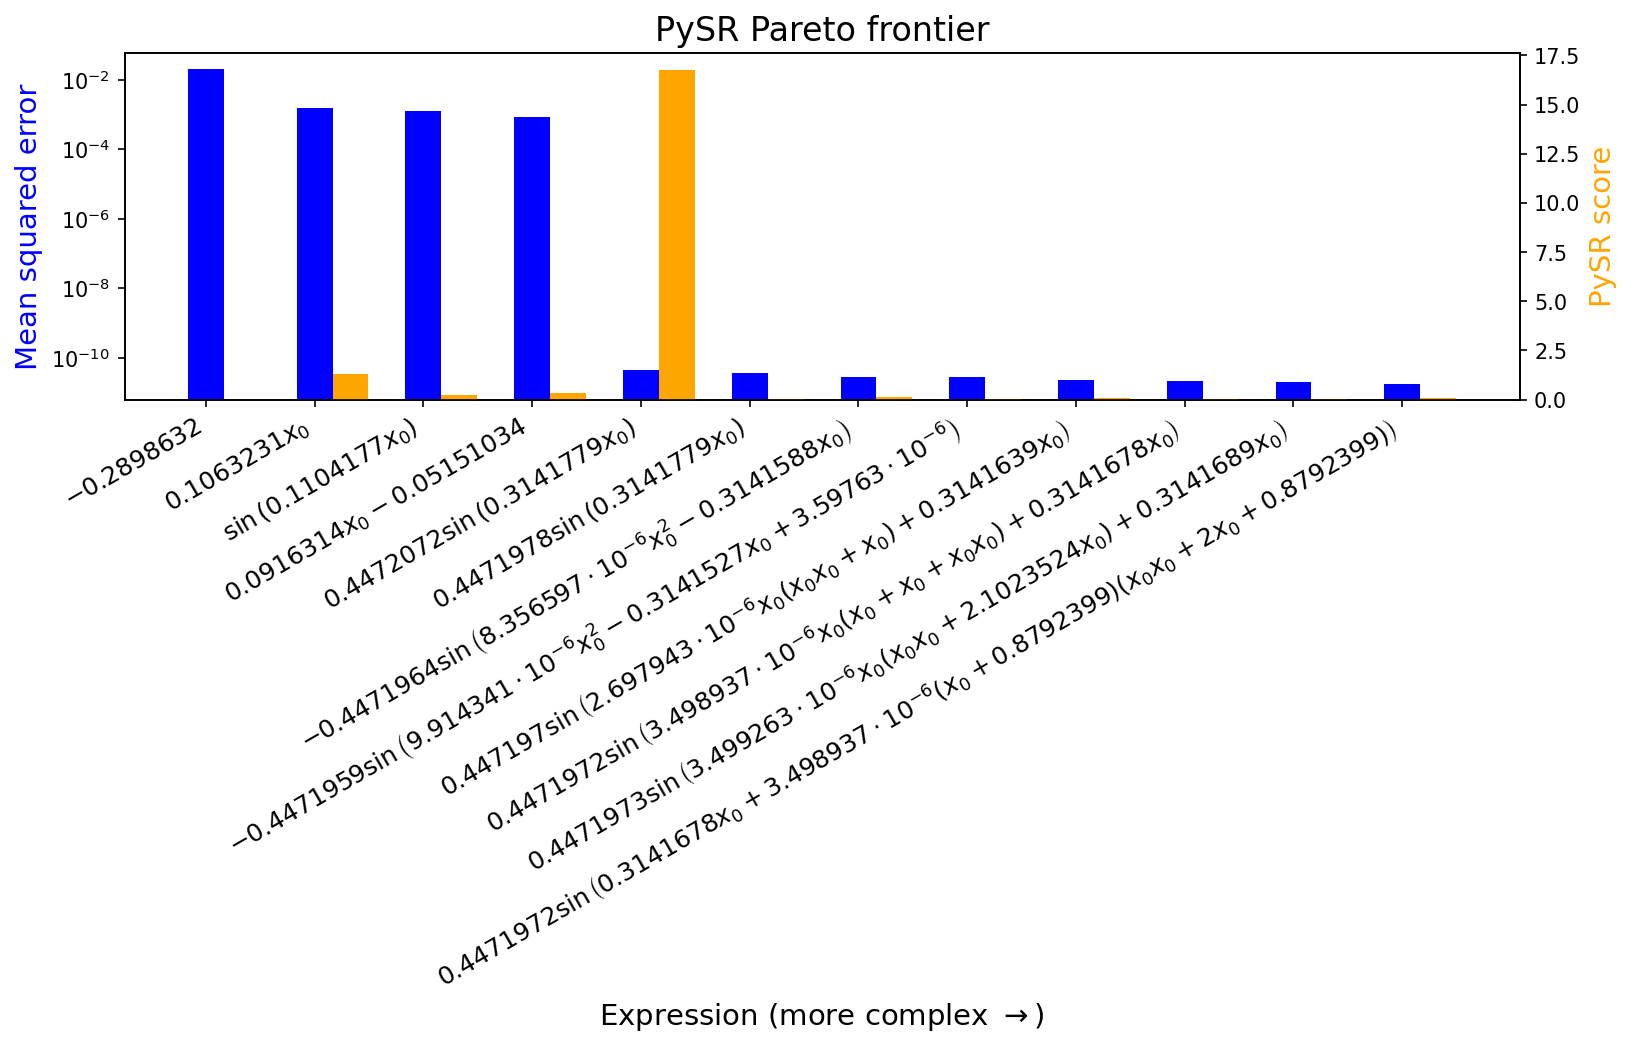

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3), dpi=150)
plt.bar(
    np.arange(len(equations.equations_)),
    equations.equations_.loss,
    width=0.33,
    color="blue",
)


plt.yscale("log")
plt.ylabel("Mean squared error", fontsize=14, color="blue")
plt.xticks(
    range(len(equations.equations_)),
    [f"${latex(round_expr(v,7))}$" for v in equations.equations_.sympy_format],
    rotation=30,
    ha="right",
    fontsize=12,
)
plt.title("PySR Pareto frontier", fontsize=16)
plt.xlabel("Expression (more complex $\\to$)", fontsize=14)

ax2 = plt.twinx()
ax2.bar(
    np.arange(len(equations.equations_)) + 0.33,
    equations.equations_.score,
    width=0.33,
    color="orange",
)
ax2.set_ylabel("PySR score", color="orange", fontsize=14)

plt.show()

In [16]:
import pandas as pd

# Replace with the actual filename generated
hall_of_fame_df = pd.read_csv("outputs/20251012_020237_MDpOy6/hall_of_fame.csv")
count=0
equ=hall_of_fame_df.Equation
for i in equ:
    print("f(x0)",count,'=',i)
    print('---')
    count+=1

f(x0) 0 = -0.28986317
---
f(x0) 1 = x0 * 0.106323056
---
f(x0) 2 = sin(x0 * 0.11041768)
---
f(x0) 3 = (x0 + -0.5621473) * 0.091631405
---
f(x0) 4 = sin(x0 * 0.3141779) * 0.4472072
---
f(x0) 5 = sin((((x0 + ((x0 * 0.015661625) + x0)) * 0.0033488427) + x0) * 0.31207144) * 0.44719782
---
f(x0) 6 = sin(((((x0 + (x0 * (x0 * -0.008001276))) + x0) * 0.0033466874) + x0) * 0.31207025) * 0.44719642
---
f(x0) 7 = sin(0.31206414 * (((x0 + ((((x0 * x0) + 0.36287135) * -0.009492978) + x0)) * 0.0033466874) + x0)) * 0.4471959
---
f(x0) 8 = sin((((x0 + (((x0 * 0.0025811982) * ((x0 * x0) + x0)) + x0)) * 0.0033492972) + x0) * 0.31207344) * 0.447197
---
f(x0) 9 = sin((((x0 + ((((x0 + x0) + (x0 * x0)) * (x0 * 0.0033466886)) + x0)) * 0.0033501494) + x0) * 0.31207666) * 0.44719723
---
f(x0) 10 = sin(((((((x0 * ((x0 + (x0 * 1.1023524)) + (x0 * x0))) * 0.0033466886) + x0) + x0) * 0.0033504162) + x0) * 0.31207776) * 0.4471973
---
f(x0) 11 = sin((((x0 + ((((x0 + (x0 + 0.8792399)) + (x0 * x0)) * ((x0 + 0.8792399)